In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters

In [98]:
import h5py

f = h5py.File("chuyu_pattern.h5", "r")
image = (np.array(f["image"])/20).astype(np.uint8)

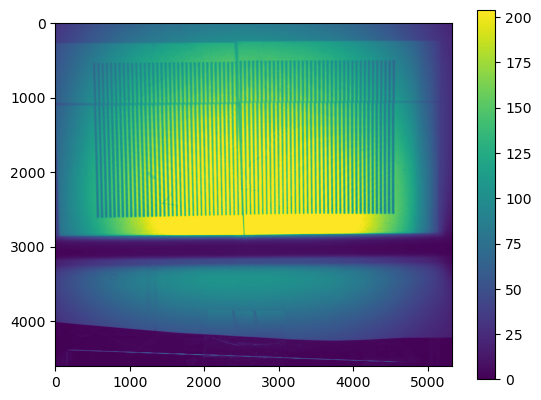

In [3]:
plt.imshow(image)
plt.colorbar()

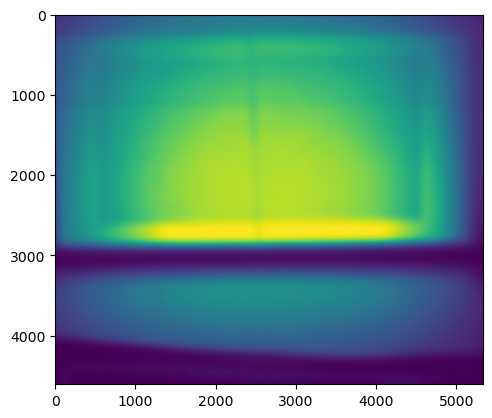

In [4]:
# blur
smooth = cv2.GaussianBlur(image, (333,333), 0)
plt.imshow(smooth)

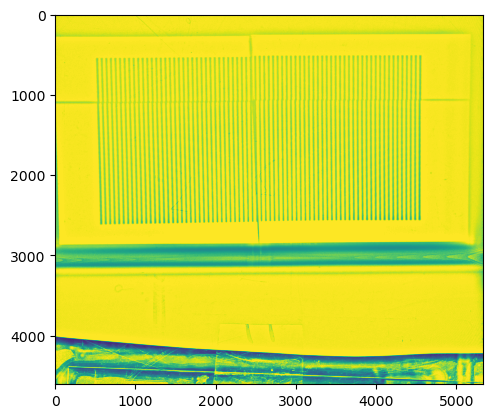

In [5]:

# divide gray by morphology image
division = cv2.divide(image, smooth, scale=255)

plt.imshow(division)

In [6]:
# sharpen using unsharp masking
sharp = filters.unsharp_mask(division, radius=30, amount=2.5, preserve_range=False)
sharp = (255*sharp).clip(0,255).astype(np.uint8)

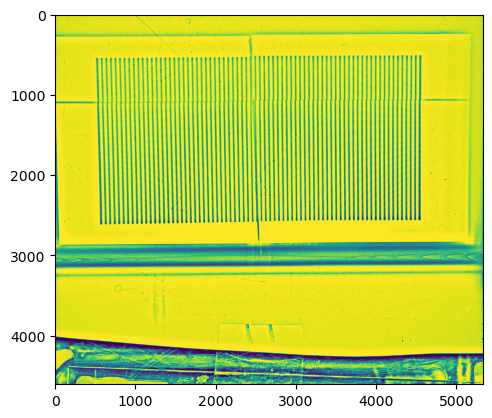

In [7]:
plt.imshow(sharp)

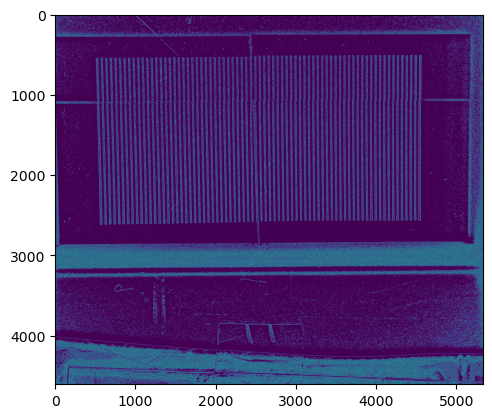

In [8]:
edges = cv2.Canny(sharp, 200, 250)
plt.imshow(edges)

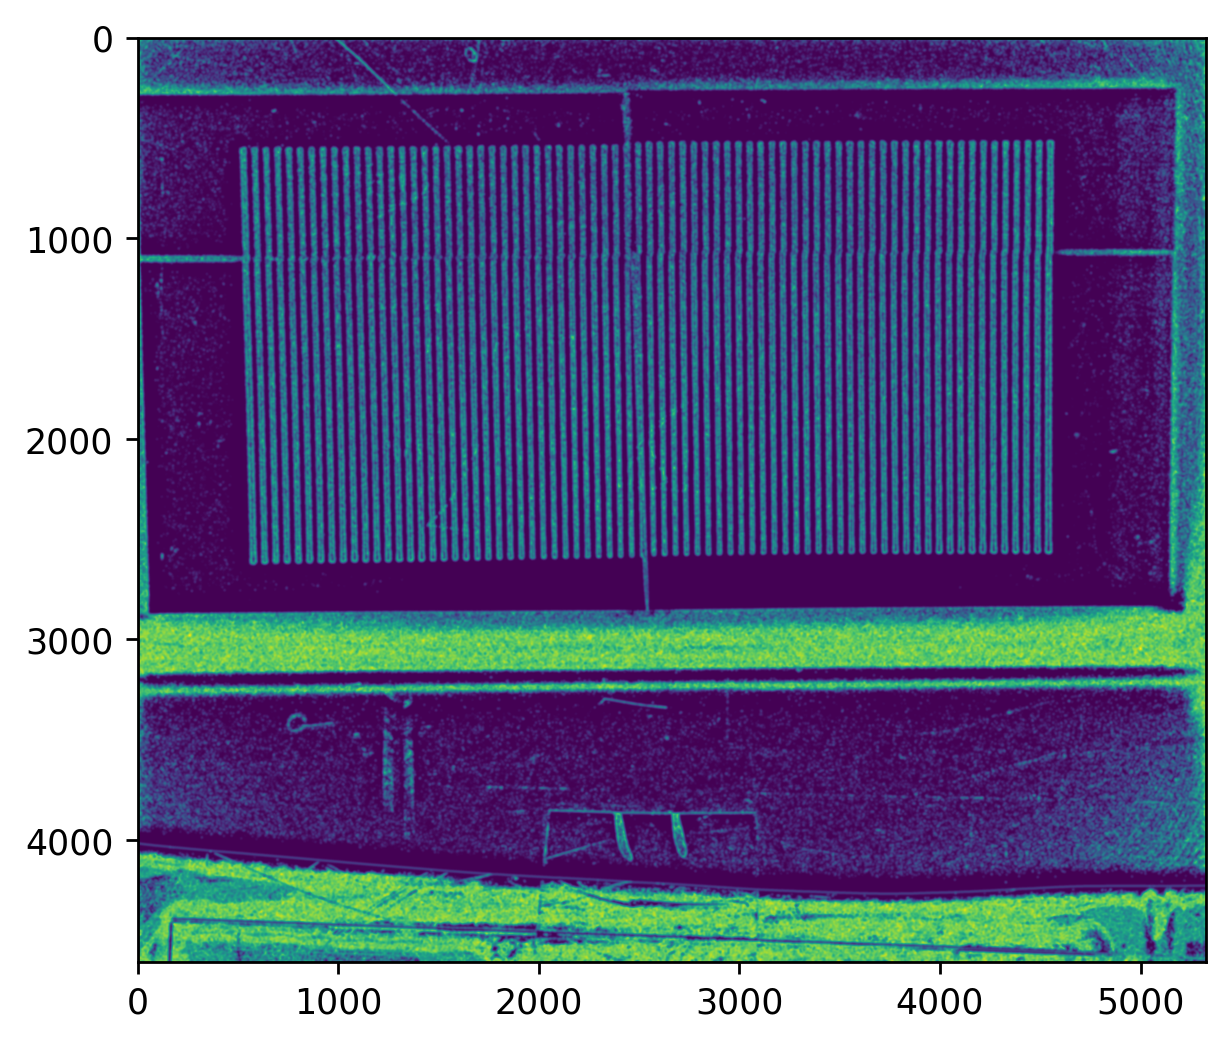

In [9]:

edged = cv2.GaussianBlur(edges, (31, 31), 0)
plt.figure(dpi=250)
plt.imshow(edged)
plt.show()
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]


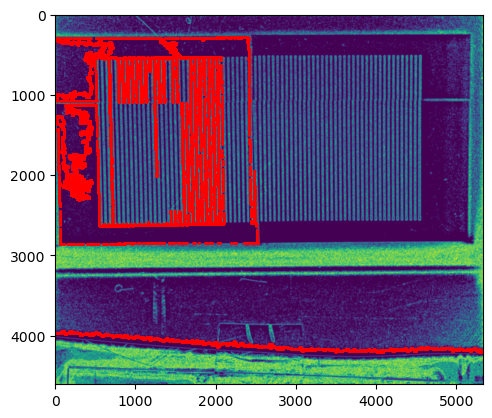

In [10]:
which_contour = 0
contour_x = cnts[which_contour][:,0,0]
contour_y = cnts[which_contour][:,0,1]


plt.imshow(edged)
plt.scatter(contour_x,contour_y, s= 1, color="r")





<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
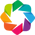

In [11]:
import numpy as np
import holoviews as hv
from holoviews import opts
from holoviews import streams
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt


hv.extension('bokeh')

In [12]:
import os
os.getcwd()

'/home/chuyu/projector'

In [13]:
%matplotlib inline

# Mark points

In [70]:
subsampled_array = np.copy(image[::4,::4])
img = hv.Image((range(subsampled_array.shape[1]), range(subsampled_array.shape[0]), subsampled_array))
points = hv.Points([]).opts(width=500, height=500, responsive=False, padding=0)

points_annotator = hv.annotate.instance()

img.opts(cmap="viridis")
points = img*points

points_annotator(points)

:Layout
   .DynamicMap.I             :DynamicMap   []
      :Overlay
         .Image.I  :Image   [x,y]   (z)
         .Points.I :Points   [x,y]
   .Annotator.PointAnnotator :Overlay
      .Table.PointAnnotator :Table   [x,y]

In [71]:
rect = np.array([
    [140, 654], 
    [127, 138],
    [1138, 642],
    [1140, 129],
    
]) *4

In [66]:
points_annotator.annotated.dframe()


Empty DataFrame
Columns: [x, y]
Index: []

In [249]:
the_point = points_annotator.annotated.iloc[-1].dframe().to_numpy()[0]
the_point*=4
the_point

IndexError: index -1 is out of bounds for axis 0 with size 0

In [14]:
f2 = h5py.File("surface_array.h5", "r")
image_dmd = (np.array(f2["data"])).astype(np.uint8)

In [16]:
image_dmd.shape

(1200, 1920, 3)

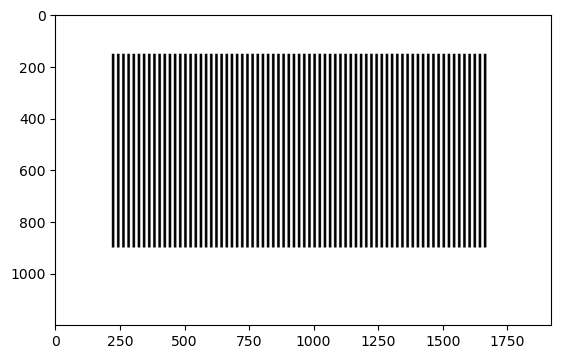

In [20]:
plt.imshow(image_dmd)

In [19]:
rec

array([[ 140,  654],
       [ 127,  138],
       [1138,  642],
       [1140,  129]])

In [72]:
W = 1920
H = 1200

x1 = 0
y1 = 0

x2 = W
y2 = 0

x3 = 0
y3 = H

x4 = W
y4 = H

In [73]:
X1 = rect[1,0]
Y1 = rect[1,1]

X2 = rect[3,0]
Y2 = rect[3,1]

X3 = rect[0,0]
Y3 = rect[0,1]

X4 = rect[2,0]
Y4 = rect[2,1]

In [74]:
x_all = np.array([
    [x1, y1],
    [x2, y2],
    [x3, y3],
    [x4, y4],
]).T

X_all = np.array([
    [X1, Y1],
    [X2, Y2],
    [X3, Y3],
    [X4, Y4],
]).T

In [75]:
x_all_plusone = np.vstack([x_all, np.ones((1, x_all.shape[1]))])
X_all_plusone = np.vstack([X_all, np.ones((1, X_all.shape[1]))])

# Least square approach

In [76]:
A = np.array([
    [x1, y1, 1, 0, 0, 0, 0, 0, -X1, 0, 0, 0],
    [0, 0, 0, x1, y1, 1, 0, 0, -Y1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, x1, y1, -1, 0, 0, 0],
    [x2, y2, 1, 0, 0, 0, 0, 0, 0, -X2, 0, 0],
    [0, 0, 0, x2, y2, 1, 0, 0, 0, -Y2, 0, 0],
    [0, 0, 0, 0, 0, 0, x2, y2, 0, -1, 0, 0],
    [x3, y3, 1, 0, 0, 0, 0, 0, 0, 0, -X3, 0],
    [0, 0, 0, x3, y3, 1, 0, 0, 0, 0, -Y3, 0],
    [0, 0, 0, 0, 0, 0, x3, y3, 0, 0, -1, 0],
    [x4, y4, 1, 0, 0, 0, 0, 0, 0, 0, 0, -X4],
    [0, 0, 0, x4, y4, 1, 0, 0, 0, 0, 0, -Y4],
    [0, 0, 0, 0, 0, 0, x4, y4, 0, 0, 0, -1],
])

b = np.array([
    0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1
])

In [77]:
A.shape

(12, 12)

In [78]:
params, _, _, _ = np.linalg.lstsq(A, b)

/tmp/ipykernel_1763738/4116921136.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _ = np.linalg.lstsq(A, b)


In [79]:
A00, A01, b0, A10, A11, b1, h0, h1, w0, w1, w2, w3 = params

In [80]:
M = np.array([
    [A00, A01, b0],
    [A10, A11, b1],
    [h0, h1, 1]
])

In [81]:
X_all_estimated_ = M@x_all_plusone

In [82]:
X_all_estimated_

array([[5.08000000e+02, 4.58827120e+03, 5.68423792e+02, 4.64869499e+03],
       [5.52000000e+02, 5.19199109e+02, 2.65535114e+03, 2.62255025e+03],
       [1.00000000e+00, 1.00619982e+00, 1.01504248e+00, 1.02124231e+00]])

In [83]:
X_all_estimated = X_all_estimated_[0:2,:]/X_all_estimated_[2,:]

In [84]:
X_all_estimated

array([[ 508.00000008, 4560.0000001 ,  559.99999996, 4551.99999851],
       [ 552.00000008,  516.00000001, 2615.99999983, 2567.99999916]])

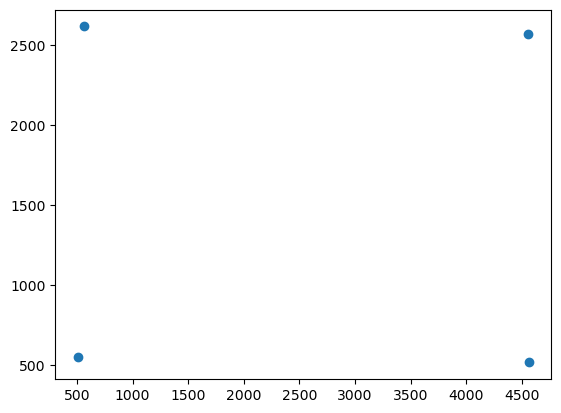

In [85]:
plt.scatter(X_all_estimated[0,:],X_all_estimated[1,:])

In [86]:
X_all

array([[ 508, 4560,  560, 4552],
       [ 552,  516, 2616, 2568]])

In [87]:
y_grid, x_grid = np.meshgrid(np.arange(H), np.arange(W))

In [88]:
x_grid.reshape(-1,)

array([   0,    0,    0, ..., 1919, 1919, 1919])

In [89]:
y_grid.reshape(-1,)

array([   0,    1,    2, ..., 1197, 1198, 1199])

In [90]:
x_gird_plusone = np.vstack([x_grid.reshape(-1,), y_grid.reshape(-1,), np.ones((1, len(y_grid.reshape(-1,))))])

In [91]:
X_gird = M@x_gird_plusone

In [92]:
X_gird = np.floor(X_gird[0:2,:]/X_gird[2,:]).astype(int)

In [93]:
X_gird.shape

(2, 2304000)

(-95.95, 2014.95, -59.95, 1258.95)

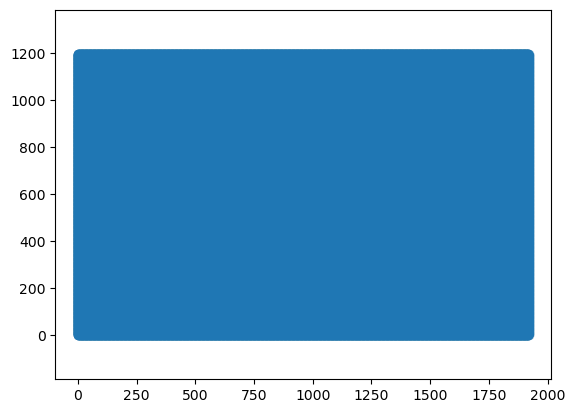

In [94]:
plt.scatter(x_grid, y_grid, alpha=0.1)
plt.axis("equal")

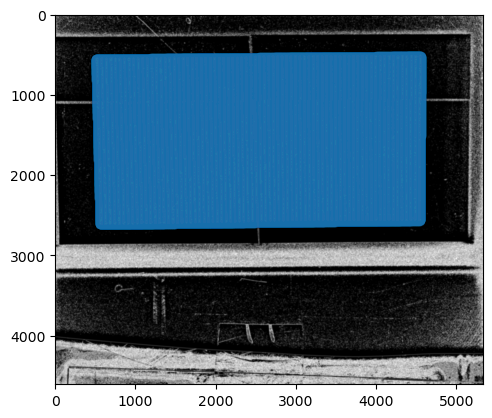

In [95]:
plt.imshow(edged, cmap="gray")
plt.scatter(X_gird[0,:], X_gird[1,:], alpha=0.1)

In [105]:
image_map = np.zeros((W, H), dtype = np.uint8)

In [106]:
image_map[x_grid.reshape(-1,), y_grid.reshape(-1,)] = image[X_gird[1,:], X_gird[0,:]]

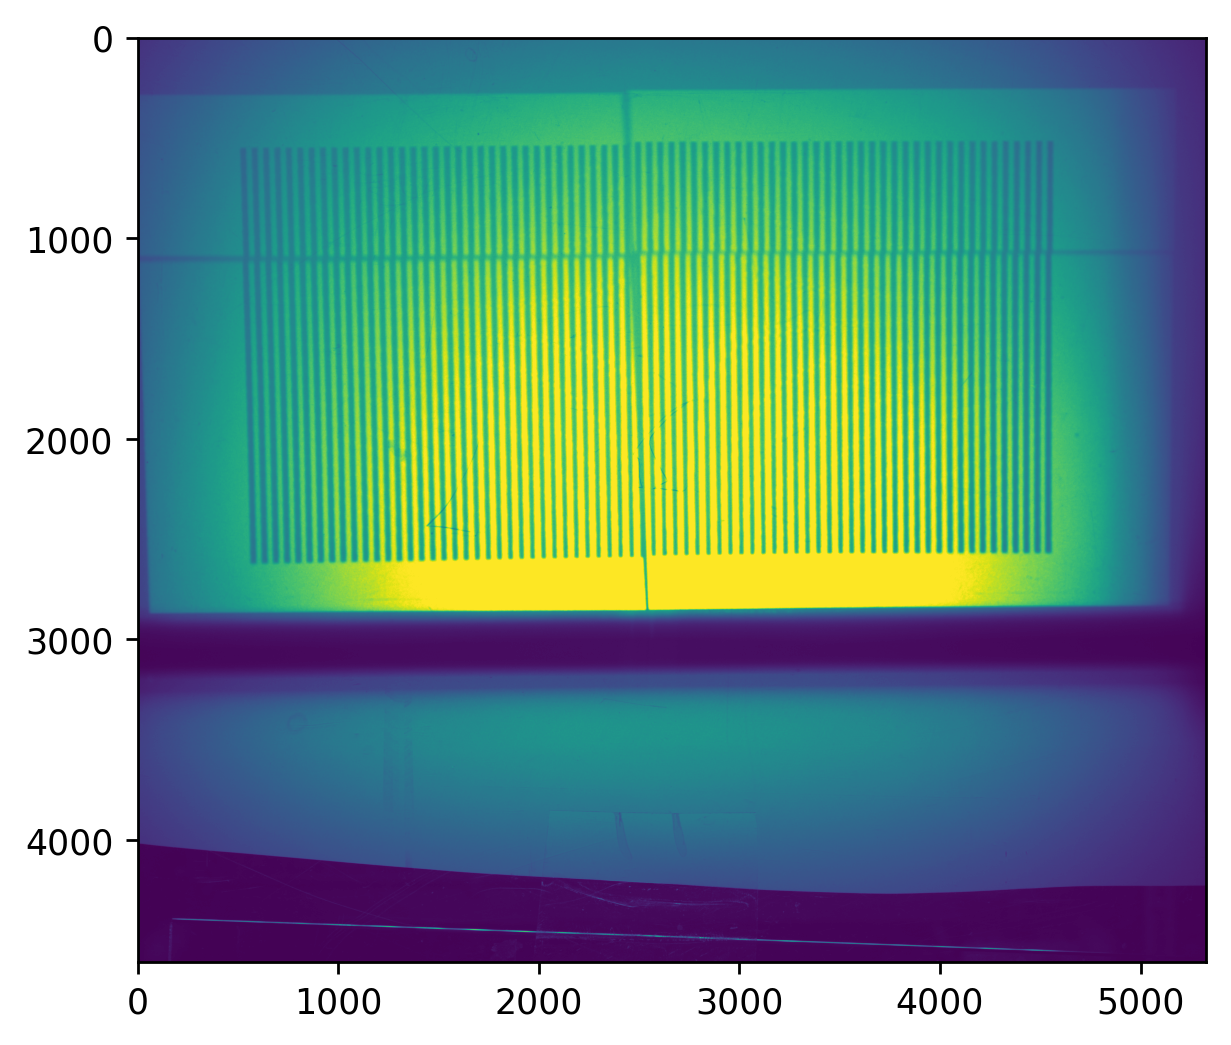

In [107]:
plt.figure(dpi=250)
plt.imshow(image)

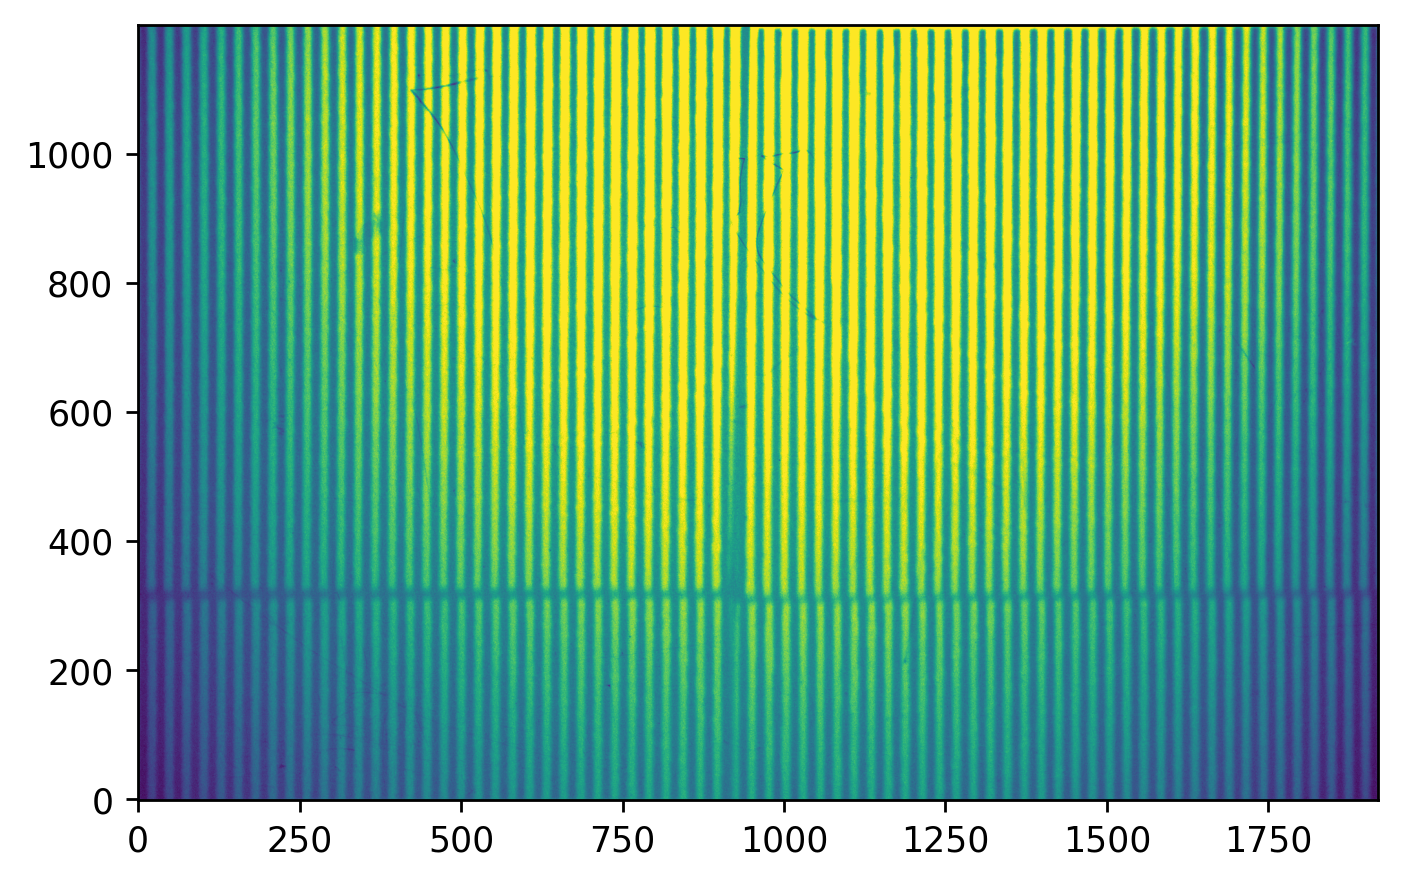

In [108]:
plt.figure(dpi=250)
plt.imshow(np.swapaxes(image_map, 0, 1), origin="lower")
